# 🔬 Simulacija in analiza temperature v Pythonu
V tem zvezku bomo:
- generirali podatke simuliranih meritev temperature,
- jih shranili v .csv,
- statististično opisali,
- vizualizirali rezultate.

In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
def generiraj_meritve(n=50):
    podatki = []
    zacetni_cas = datetime.now()
    for i in range(n):
        temperatura = round(random.uniform(20.0, 30.0), 2)
        cas = zacetni_cas + timedelta(seconds=i * 10)
        podatki.append({'cas': cas, 'temperatura': temperatura})
    return pd.DataFrame(podatki)

df = generiraj_meritve()
df.to_csv("meritve_notebook.csv", index=False)
df.head()

,cas,temperatura
0,2025-04-23 08:07:23.978565,23.82
1,2025-04-23 08:07:33.978565,24.80
2,2025-04-23 08:07:43.978565,28.60
3,2025-04-23 08:07:53.978565,27.95
4,2025-04-23 08:08:03.978565,20.38


In [3]:
df.describe()

,cas,temperatura
count,50,50.000000
mean,2025-04-23 08:11:28.978565120,25.360000
min,2025-04-23 08:07:23.978565,20.380000
25%,2025-04-23 08:09:26.478565120,23.427500
50%,2025-04-23 08:11:28.978565120,25.520000
75%,2025-04-23 08:13:31.478565120,27.705000
max,2025-04-23 08:15:33.978565,29.750000
std,NaN,2.807096


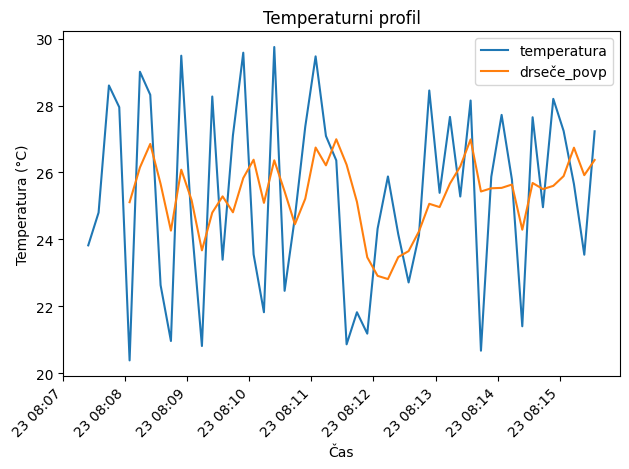

In [4]:
df['drseče_povp'] = df['temperatura'].rolling(window=5).mean()
df.plot(x='cas', y=['temperatura', 'drseče_povp'], title="Temperaturni profil")
plt.xlabel("Čas")
plt.ylabel("Temperatura (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()